# Task a) and b) of Project 1 - FYS-STK4155

In [1]:
from pathlib import Path

from functions import *

%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

out_dir = Path("../Figures")      # fra Code/ til Figures/
out_dir.mkdir(parents=True, exist_ok=True)

# For reproducibility
np.random.seed(2018)
seed = np.random.seed(2018)

# a) Ordinary Least Squares (OLS)
* Using OLS to predict the Runge function.
* Method is applied for the different number of data points in `n_vals` and for the different polynomial degrees in `p_vals`.
* Model performance assessed with MSE score and R^2 score.
* OLS on the Runge function is performed with and without noise in the data, to see the effects of stochastic noise.

* Uses scikitlearn tools as `StandardScaler` and `split_test_train`.

In [2]:
n = 700  # samples
p_vals = np.arange(2, 16)  # polynomial degrees

In [3]:
# OLS regression analysis with varying polynomial degree, fixed number of samples
# This is with added stochastic noise
df_OLS_degs = OLS_various_poly_deg(n, p_vals, noise=True)  # Dataframe with results

In [4]:
# OLS regression analysis with varying polynomial degree, fixed number of samples
# This is without added stochastic noise
df_OLS_degs_no_noise = OLS_various_poly_deg(n, p_vals, noise=False)  # Dataframe with results

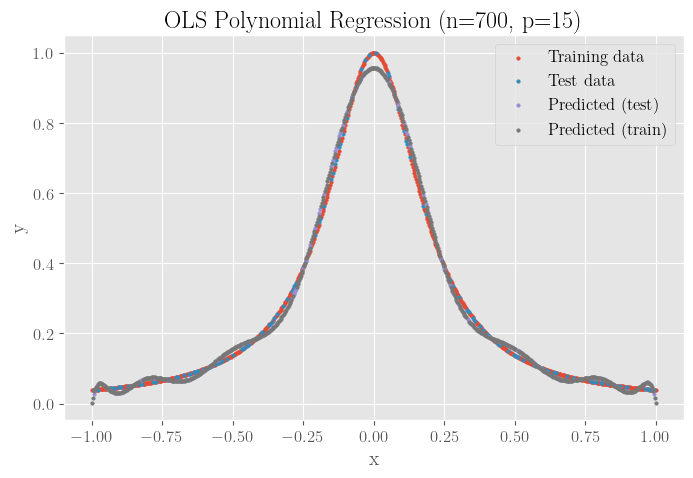

In [5]:
plot_OLS_results(df_OLS_degs_no_noise, p=15, n=700)

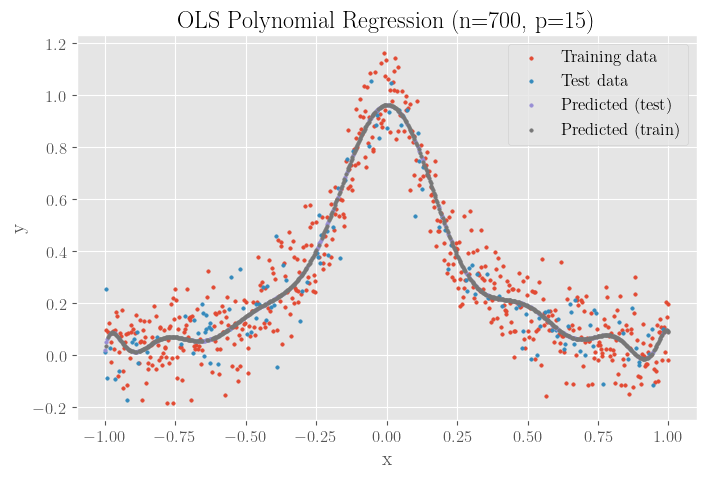

In [6]:
plot_OLS_results(df_OLS_degs, p=15, n=700)

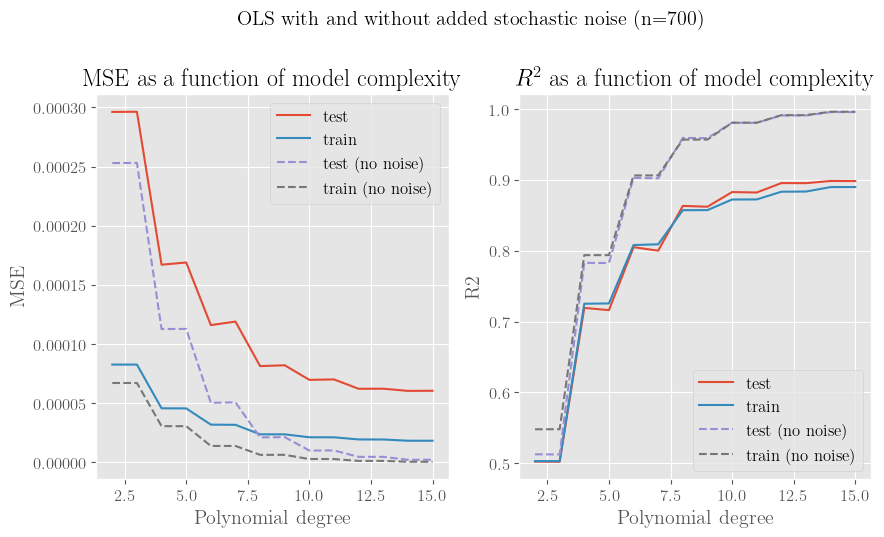

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_test'], label='test')
ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_train'], label='train')

ax[0].plot(df_OLS_degs_no_noise['p'], df_OLS_degs_no_noise['MSE_test'], linestyle='--', label='test (no noise)')
ax[0].plot(df_OLS_degs_no_noise['p'], df_OLS_degs_no_noise['MSE_train'], linestyle='--', label='train (no noise)')

ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_test'], label='test')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_train'], label='train')

ax[1].plot(df_OLS_degs_no_noise['p'], df_OLS_degs_no_noise['R2_test'], linestyle='--', label='test (no noise)')
ax[1].plot(df_OLS_degs_no_noise['p'], df_OLS_degs_no_noise['R2_train'], linestyle='--', label='train (no noise)')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')

ax[0].set_title('MSE as a function of model complexity')
ax[1].set_title(r'$R^2$ as a function of model complexity')

for axs in ax:
    axs.legend()
    axs.set_xlabel('Polynomial degree')

fig.suptitle(f'OLS with and without added stochastic noise (n={n})', y=1.05)

fig.savefig(out_dir / "a_OLS_MSE_R2_noise_no_noise.pdf", dpi=200, bbox_inches="tight")

In [8]:
# Percentage difference in MSE (test) when noise is added
((df_OLS_degs_no_noise['MSE_test'] - df_OLS_degs['MSE_test'])/df_OLS_degs_no_noise['MSE_test'])*100

0      -17.071425
1      -17.073440
2      -48.244073
3      -49.746934
4     -130.233504
5     -134.312380
6     -284.697241
7     -284.171330
8     -594.657841
9     -592.630691
10   -1217.752559
11   -1216.701084
12   -2575.657344
13   -2574.712776
Name: MSE_test, dtype: float64

Added stochastic noise, worsened the MSE. The magnitude grows with polynomial degree, suggesting that higher order polynomials are more sensitive to noise, likely due to overfitting (amplifying the noise).

In [9]:
min_mse = df_OLS_degs.loc[df_OLS_degs['MSE_test'].idxmin()]

# Get the p value for minimum mse
best_p = min_mse['p']

print("The polynomial degree with the lowest MSE_test is:", best_p)

The polynomial degree with the lowest MSE_test is: 14


For OLS, the best model is found with polynomial degree 15, when evaluating MSE/R^2 for 700 data points.

In [10]:
p = 14  # Polynomial degree
n_vals = np.arange(10, 2000, 100)  # samples

In [11]:
# OLS regression analysis with varying number of samples, fixed polynomial degree
# This is with added stochastic noise
df_OLS_points = OLS_various_n_data(p, n_vals)  # Dataframe with results for one poly degree and for different number of samples

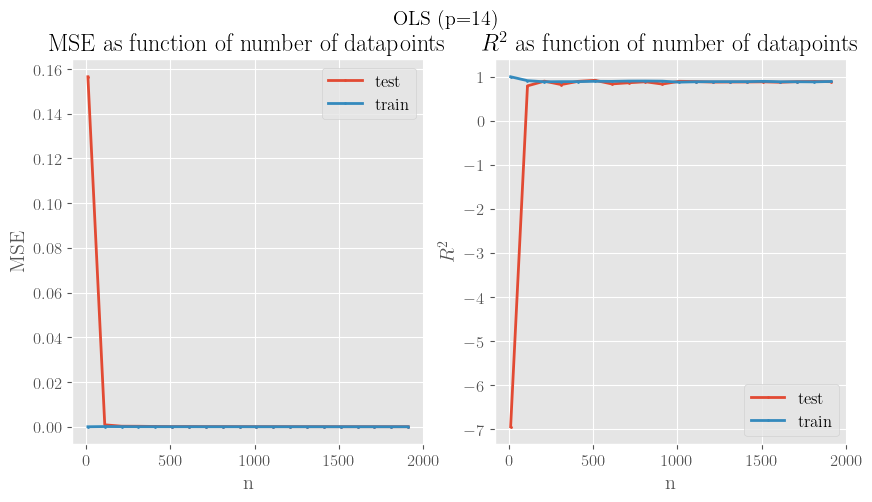

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_OLS_points['n'], df_OLS_points['MSE_test'], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_OLS_points['n'], df_OLS_points['MSE_train'], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_OLS_points['n'], df_OLS_points['R2_test'], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_OLS_points['n'], df_OLS_points['R2_train'], marker='o', markersize='1', linewidth='2', label='train')

ax[0].set_title('MSE as function of number of datapoints ')
ax[1].set_title(r'$R^2$ as function of number of datapoints')

fig.suptitle(f'OLS (p={p})')

for axs in ax:
    axs.set_xlabel('n')
    axs.legend()

ax[0].set_ylabel('MSE')
ax[1].set_ylabel(r'$R^2$')

fig.savefig(out_dir / "a_OLS_MSE_samples.pdf", dpi=200, bbox_inches="tight")

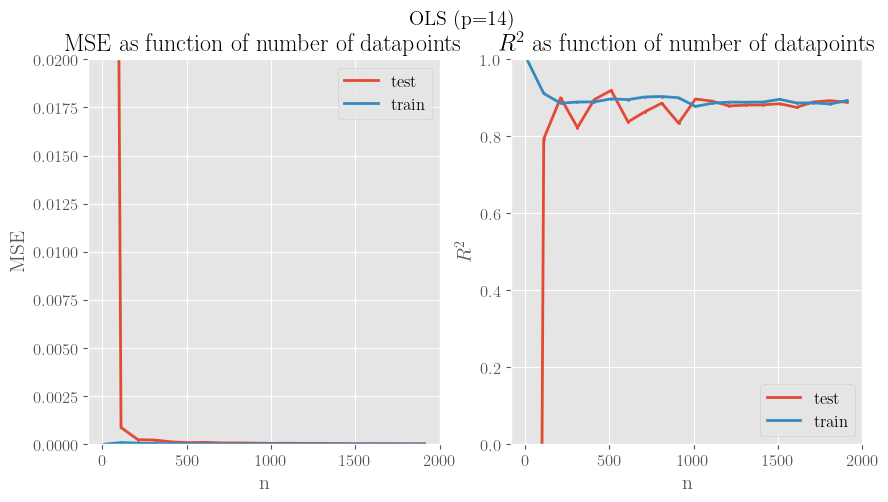

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_OLS_points['n'], df_OLS_points['MSE_test'], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_OLS_points['n'], df_OLS_points['MSE_train'], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_OLS_points['n'], df_OLS_points['R2_test'], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_OLS_points['n'], df_OLS_points['R2_train'], marker='o', markersize='1', linewidth='2', label='train')

ax[0].set_title('MSE as function of number of datapoints ')
ax[1].set_title(r'$R^2$ as function of number of datapoints')

ax[0].set_ylim([0, 0.02])
ax[1].set_ylim([0, 1])


fig.suptitle(f'OLS (p={p})')

for axs in ax:
    axs.set_xlabel('n')
    axs.legend()

ax[0].set_ylabel('MSE')
ax[1].set_ylabel(r'$R^2$')

fig.savefig(out_dir / "a_OLS_MSE_samples_yscale_lim.pdf", dpi=200, bbox_inches="tight")

We see that number of data points is important for the performance of OLS. Here, with $p=14$, $n>1000$ seems to be a sufficient number of samples.

# b) Ridge regression
* Using Ridge regression to predict the Runge function.
* Method is applied for different polynomial degrees (`p_vals`), and for different values of the penalization parameter $\lambda$.
* Assessing model perfomance with MSE and R^2.

In [15]:
n = 700  # samples
lamb = 0.1  # regularization term
p_vals = np.arange(2, 16)  # range of polynomial degrees

In [16]:
# Ridge regression analysis with varying polynomial degree, fixed number of samples and fixed lambda
# This is with added stochastic noise
df_Ridge_degs = Ridge_various_poly_deg(n, lamb, p_vals)  # dataframe w results

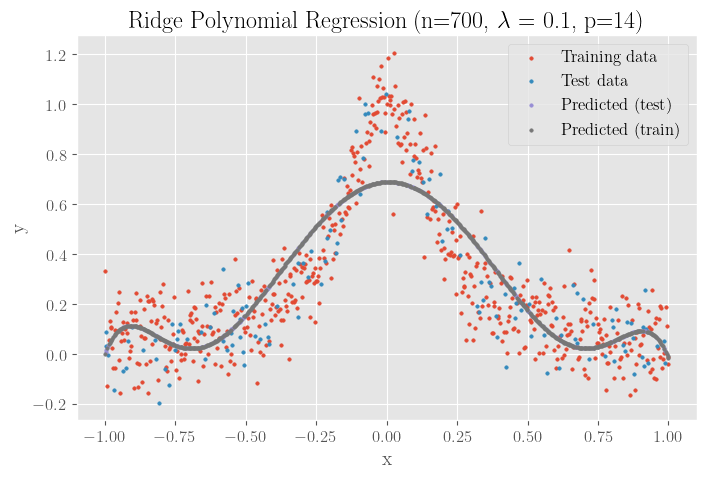

In [17]:
plot_Ridge_results(df_Ridge_degs, p=14, n=700, lamb=lamb)

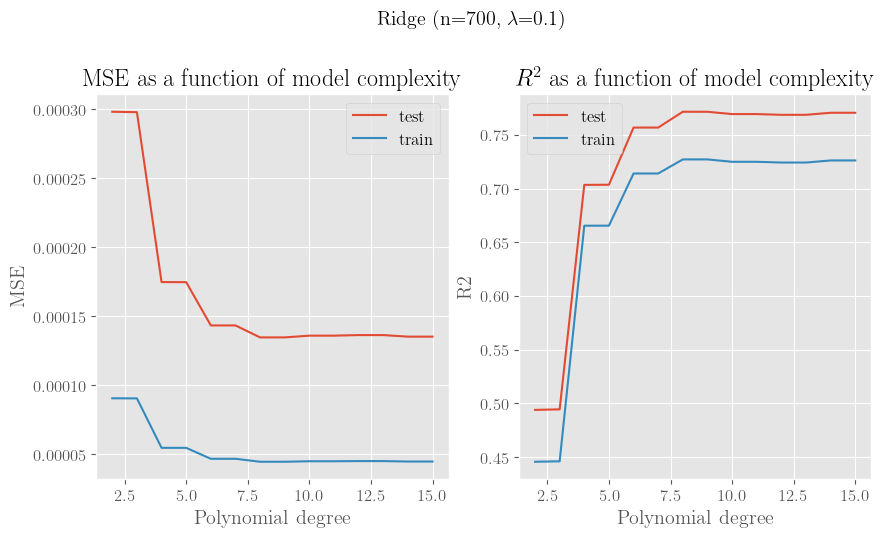

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_test'], label='test')
ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_train'], label='train')

ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_test'], label='test')
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')

ax[0].set_title('MSE as a function of model complexity')
ax[1].set_title(r'$R^2$ as a function of model complexity')

for axs in ax:
    axs.legend()
    axs.set_xlabel('Polynomial degree')

fig.suptitle(rf'Ridge (n={n}, $\lambda$={lamb})', y=1.05)

fig.savefig(out_dir / "b_Ridge_MSE_degree.pdf", dpi=200, bbox_inches="tight")

In [19]:
min_mse = df_Ridge_degs.loc[df_Ridge_degs['MSE_test'].idxmin()]

# Get the p value for minimum mse
best_p = min_mse['p']

print("The polynomial degree with the lowest MSE_test is:", best_p)

The polynomial degree with the lowest MSE_test is: 8


For Ridge regression with $n=700$ and $\lambda = 0.1$, the best model complexity is $p=8$.

In [20]:
p = 8
lamb = 0.1
n_vals = np.arange(10, 2000, 100)  # samples

In [21]:
# Ridge regression analysis with varying number of samples, fixed polynomial degree and fixed lambda
# This is with added stochastic noise
df_Ridge_points = Ridge_various_n_data(p, lamb, n_vals)

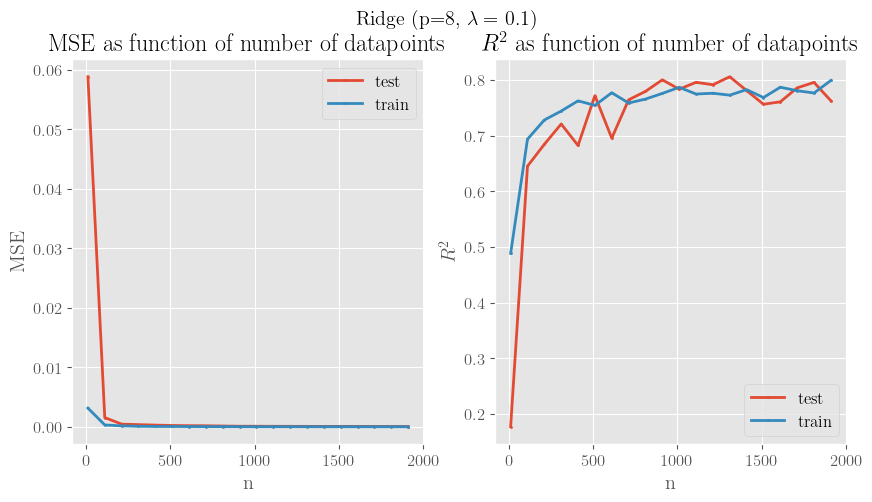

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_Ridge_points['n'], df_Ridge_points['MSE_test'], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_Ridge_points['n'], df_Ridge_points['MSE_train'], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_Ridge_points['n'], df_Ridge_points['R2_test'], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_Ridge_points['n'], df_Ridge_points['R2_train'], marker='o', markersize='1', linewidth='2', label='train')

ax[0].set_title('MSE as function of number of datapoints ')
ax[1].set_title(r'$R^2$ as function of number of datapoints')

fig.suptitle(rf'Ridge (p={p}, $\lambda = $ {lamb})')

for axs in ax:
    axs.set_xlabel('n')
    axs.legend()

ax[0].set_ylabel('MSE')
ax[1].set_ylabel(r'$R^2$')

fig.savefig(out_dir / "b_Ridge_MSE_samples.pdf", dpi=200, bbox_inches="tight")

In [23]:
min_mse = df_Ridge_points.loc[df_Ridge_points['MSE_test'].idxmin()]

# Get the p value for minimum mse
best_n = min_mse['n']

print("The polynomial degree with the lowest MSE_test is:", best_n)

The polynomial degree with the lowest MSE_test is: 1910


In [24]:
max_r2 = df_Ridge_points.loc[df_Ridge_points['R2_test'].idxmax()]

# Get the p value for maximum r2
best_n = max_r2['n']

print("The polynomial degree with the largest r2_test is:", best_n)

The polynomial degree with the largest r2_test is: 1310


For Ridge regression with polynomial degree 8 and $\lambda = 0.1$, $n>1000$ seems sufficient. 

In [25]:
n = 1500
p = 8
lambs = np.logspace(-10, 1, 15)

In [26]:
# Ridge regression analysis with varying lambda, with fixed polynomial degree and fixed number of samples
# This is with added stochastic noise
df_Ridge_lambs = Ridge_various_lambs(n, p, lambs)

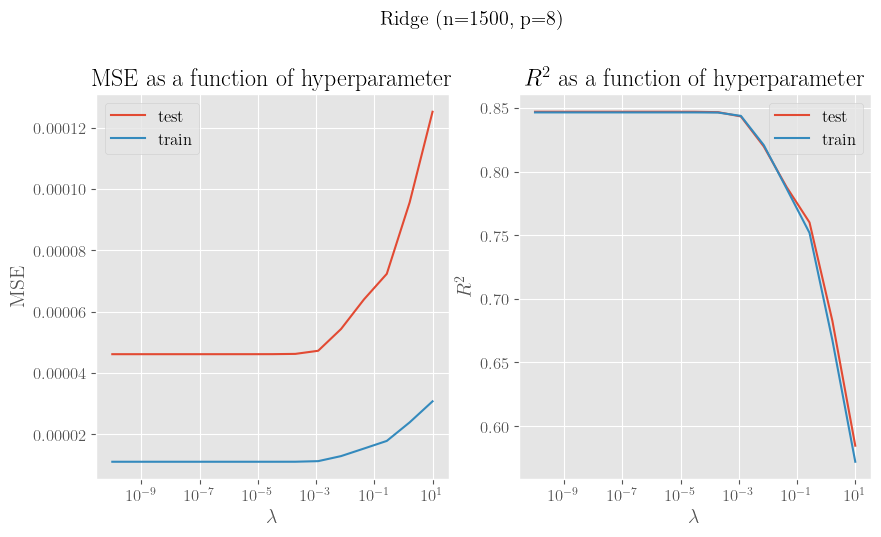

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['MSE_test'], label='test')
ax[0].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['MSE_train'], label='train')

ax[1].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['R2_test'], label='test')
ax[1].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel(r'$R^2$')

ax[0].set_title('MSE as a function of hyperparameter')
ax[1].set_title(r'$R^2$ as a function of hyperparameter')

for axs in ax:
    axs.legend()
    axs.set_xlabel(r'$\lambda$')

fig.suptitle(f'Ridge (n={n}, p={p})', y=1.05)

fig.savefig(out_dir / "b_Ridge_MSE_lambda.pdf", dpi=200, bbox_inches="tight")

In [28]:
min_mse = df_Ridge_lambs.loc[df_Ridge_lambs['MSE_test'].idxmin()]

# Get the p value for minimum mse
best_l = min_mse['lambda']

print("The lambda with the lowest MSE_test is:", best_l)

The lambda with the lowest MSE_test is: 1e-10


The MSE of Ridge regression increases with $\lambda$, but for $\lambda < 10^{-3}$ the score is not affected. The lowest error is found at the lowest $\lambda$, aka where Ridge is most similar to OLS.

In [ ]:
fig, ax = plt.subplots()

for t, l in zip(df_Ridge_lambs['theta'], df_Ridge_lambs['lambda']):
    ls = np.ones(p+1)*l
    ax.scatter(t, ls)

ax.set_yscale('log')
ax.set_title(f'Ridge features as a function of hyperparameter \n (n={n}, p={p})')

ax.set_ylabel(r'$\lambda$')
ax.set_xlabel(r'$\theta_i$')

fig.savefig(out_dir / "b_Ridge_features_lambda.pdf", dpi=200, bbox_inches="tight")

# Comparing OLS and Ridge

* OLS: for $n=700$ -> $p=14$
* OLS: for $p=14$ -> $n>1000$

* Ridge: for $n=700$, $\lambda=0.1$ -> $p=8$
* Ridge: for $p=8$, $\lambda=0.1$ -> $n>1000$
* Ridge: for $p=8$, $n=1500$ -> $\lambda<10^{-3}$

So, to compare the methods, I will run them again but this time for the same number of data ($n=1500$), and for the best hyperparameter of Ridge ($\lambda = 10^{-3}$).

In [29]:
n = 1500
lamb = 0.001

In [30]:
best_OLS = OLS_various_poly_deg(n, p_vals)
best_Ridge = Ridge_various_poly_deg(n, lamb, p_vals)

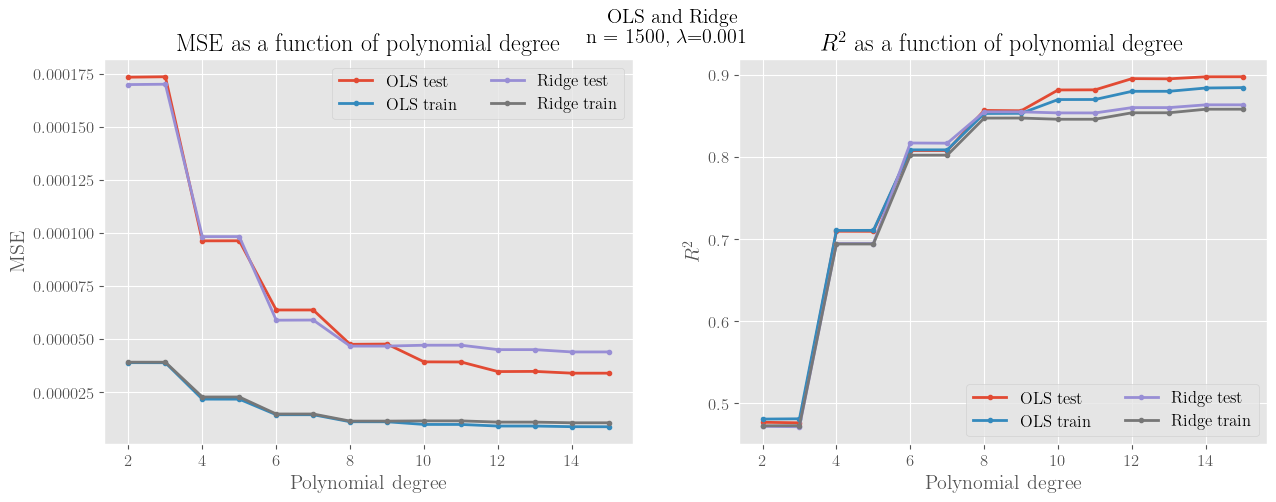

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(best_OLS['p'], best_OLS['MSE_test'], marker='o', markersize='3', linewidth='2', label='OLS test')
ax[0].plot(best_OLS['p'], best_OLS['MSE_train'], marker='o', markersize='3', linewidth='2', label='OLS train')

ax[0].plot(best_Ridge['p'], best_Ridge['MSE_test'], marker='o', markersize='3', linewidth='2', label='Ridge test')
ax[0].plot(best_Ridge['p'], best_Ridge['MSE_train'], marker='o', markersize='3', linewidth='2', label='Ridge train')


ax[0].set_title('MSE as a function of polynomial degree')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

ax[1].plot(best_OLS['p'], best_OLS['R2_test'], marker='o', markersize='3', linewidth='2', label=f'OLS test')
ax[1].plot(best_OLS['p'], best_OLS['R2_train'], marker='o', markersize='3', linewidth='2', label=f'OLS train')

ax[1].plot(best_Ridge['p'], best_Ridge['R2_test'], marker='o', markersize='3', linewidth='2', label=f'Ridge test')
ax[1].plot(best_Ridge['p'], best_Ridge['R2_train'], marker='o', markersize='3', linewidth='2', label=f'Ridge train')

ax[1].set_title(r'$R^2$ as a function of polynomial degree')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(rf'OLS and Ridge \\n = {n}, $\lambda$={lamb}')

fig.savefig(out_dir / "a_b_OLS_Ridge_MSE.pdf", dpi=200, bbox_inches="tight")

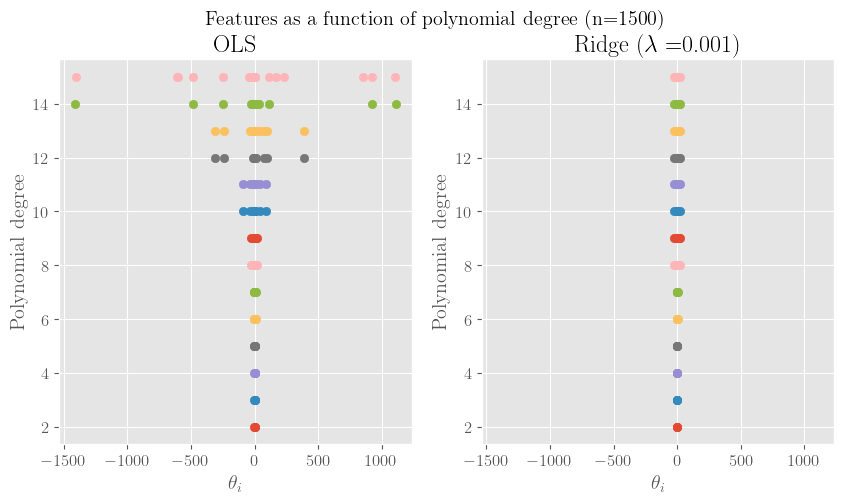

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharex=True)

for i,j in zip(best_OLS["p"], best_OLS["theta"]):
    d = np.full((i+1),fill_value=i)
    ax[0].scatter(j,d)

ax[0].set_title('OLS')

for i,j in zip(best_Ridge["p"], best_Ridge["theta"]):
    d = np.full((i+1),fill_value=i)
    ax[1].scatter(j,d)

ax[1].set_title(rf'Ridge ($\lambda =${lamb})')

for axs in ax:
    axs.set_xlabel(r'$\theta_i$')
    axs.set_ylabel('Polynomial degree')

fig.suptitle(f'Features as a function of polynomial degree (n={n})')

fig.savefig(out_dir / "a_b_features_degree.pdf", dpi=200, bbox_inches="tight")